In [1]:
try:
    import jax
except:
    %pip install jax jaxlib
    import jax
import jax.numpy as jnp

jax.config.update("jax_enable_x64", True)

try:
    import matplotlib.pyplot as plt
except:
    %pip install matplotlib
    import matplotlib.pyplot as plt

try:
    import seaborn as sns
except:
    %pip install seaborn
    import seaborn as sns

try:
    import tinygp
except ModuleNotFoundError:
    %pip install -qqq tinygp
    import tinygp
kernels = tinygp.kernels
from tinygp import GaussianProcess

In [2]:
import os

LATEXIFY = "LATEXIFY" in os.environ

if LATEXIFY:
    import sys

    sys.path.append("scripts")
    from plot_utils import latexify, savefig

    latexify(width_scale_factor=2, fig_height=2)

In [3]:
def plot(y, save_name=""):
    figsize = None if LATEXIFY else (12, 7)
    fig, ax = plt.subplots(figsize=figsize, subplot_kw={"projection": "3d"})
    ax.plot_surface(x1, x2, y, lw=0.5, cmap="viridis")
    ax.set_xlabel("input $x_1$", labelpad=-1)
    ax.set_ylabel("input $x_2$", labelpad=-1)
    ax.set_zlabel("output $y$", labelpad=-1)
    ax.view_init(None, 180 + 50)

    if LATEXIFY and len(save_name) > 0:
        savefig(save_name, bbox_inches="tight")  # Use 'tight' only when necessary (3d plots)

In [4]:
r = jnp.arange(-3, 3.1, 0.1)
N = len(r)
x1, x2 = jnp.meshgrid(r, r)
x = jnp.array([(i, j) for i, j in zip(x1.ravel(), x2.ravel())])
key = jax.random.PRNGKey(1)

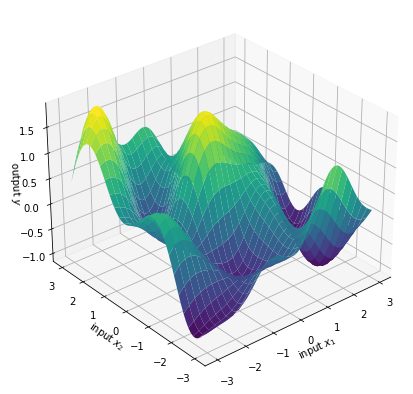

In [5]:
l1, l2 = 1.0, 1.0
kernel = tinygp.transforms.Linear(1.0 / jnp.array([l1, l2]), tinygp.kernels.ExpSquared())
gp = GaussianProcess(kernel, x)
y = gp.sample(key).reshape(N, N)
plot(y, save_name="gpDemoArd1_latexified.pdf")

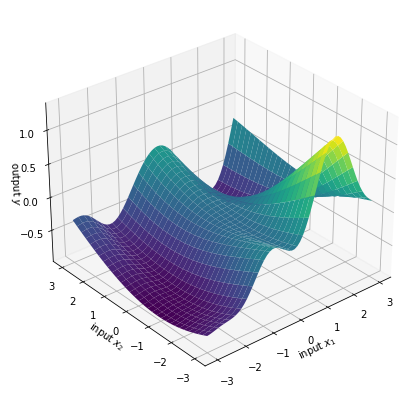

In [6]:
l1, l2 = 1.0, 5.0
kernel = tinygp.transforms.Linear(1.0 / jnp.array([l1, l2]), tinygp.kernels.ExpSquared())
gp = GaussianProcess(kernel, x)
y = gp.sample(key).reshape(N, N)
plot(y, save_name="gpDemoArd2_latexified.pdf")

## Demo

In [7]:
from ipywidgets import interact


@interact(l1=(0.5, 5.0), l2=(0.5, 5.0))
def plot_it(l1, l2):
    kernel = tinygp.transforms.Linear(1.0 / jnp.array([l1, l2]), tinygp.kernels.ExpSquared())
    gp = GaussianProcess(kernel, x)
    y = gp.sample(key).reshape(N, N)
    plot(y)
    plt.title(f"l1: {l1}, l2: {l2}")

interactive(children=(FloatSlider(value=2.75, description='l1', max=5.0, min=0.5), FloatSlider(value=2.75, des…